# Exploratory Data Analysis

I will explore the given data first. Main objectives here are:
- Understand the target distribution
- Understand the feature 
    - Explore their distribution, correlation, relation to the preparation time
    - Explore what kind of features I can use for a model
- 

## Summary of the analysis

## Data check
### Missing values
There are many missing values in this data. Many cases are corresponding to the target variable ("POL_STATUS"), so I can exclude those missing values. Also there are some columns having missing values more than 90% so I think we can remove them as well. 

### Duplicates
No duplicated rows.

## Target variable
There are 4 classes in the target variable. We can exclude "Unknown" status. Although both of lapse and cancel mean not continueing with the policy, I think their characteristics are a bit different. For example, if a homeowner found a better policy, then they might want to switch to that policy. So here, I will create a new target variable called "lapse" that merely checking if the policy was lapsed or not. After creating this target variable, the lapse class is 27.8% of the data, which is a bit more than my expectation. I thought it might be severely imbalanced but seems like there are more cases of lapse.

## Feature analysis
- [Homeowner-related features
- [Home-related features
- [Historical behaviour features
- [Renewal features]

### Potential features we could use if available
Previous home insurance history might be good indication. As it is available in the real life case and I think it is a good indicater how responsile the homeowner is. If there's no history of lapsed insurance, that indicates the owner is responsible, financially stable and less risk. This data is focusing on each policies but if there's another table related the homeowner, that would be very useful.

Sub-prime loan - financial crisis: ending date of policy, length of policy, cycle of policy
When lapsed?

## Table of contents
[Data check](#Data-check)

[Target variable](#Target-variable)

[Features analysis](#Feature-analysis)
- [Homeowner-related features](#Homeowner-related-features)
- [Home-related features](#Home-related-features)
- [Historical behaviour features](#Historical-behaviour-features)

[Potential features we could use if available](#Potential-features-we-could-use-if-available)


In [209]:
# Import modules
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as sp
import matplotlib.dates as mdates

In [3]:
os.chdir("/Users/kyosuke/projects/home-insurance/")

In [4]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Data check
This data contains 256,136 rows with 66 columns. 

### Missing values
There are many missing values in this data. Many cases are corresponding to the target variable ("POL_STATUS"), so I can exclude those missing values. Also there are some columns having missing values more than 90% so I think we can remove them as well. 

### Duplicates
No duplicated rows.

In [5]:
df = pd.read_csv("resources/data/home_insurance.csv")

In [6]:
df.shape

(256136, 66)

In [7]:
df.head()

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_METHOD,PAYMENT_FREQUENCY,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police
0,11/22/2007,22/11/2007,N,R,NaN,N,NaN,Y,19.0,1000000.0,7.0,Y,6.0,50000.0,7.0,Y,Y,7500.0,44.42,12.45,15/06/1939,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,10.0,Y,Y,N,1960.0,NaN,PureDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,274.81,Lapsed,1,P000001
1,11/22/2007,01/01/2008,N,E,NaN,Y,N,Y,25.0,1000000.0,6.0,Y,9.0,50000.0,7.0,Y,Y,0.0,0.00,24.60,20/05/1970,M,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,PH,3.0,0.0,2.0,N,N,N,1960.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,308.83,-9.27,NaN,308.83,Live,2,P000002
2,11/23/2007,23/11/2007,N,E,NaN,N,NaN,N,NaN,0.0,0.0,Y,12.0,50000.0,7.0,N,Y,0.0,0.00,0.00,10/06/1947,S,N,M,Y,Y,2.0,11.0,15.0,Y,3.0,0.0,Y,PH,8.0,0.0,9.0,N,Y,N,1946.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,52.65,52.65,03/11/2010,52.65,Live,3,P000003
3,11/23/2007,12/12/2007,N,R,NaN,N,NaN,N,NaN,0.0,0.0,Y,14.0,50000.0,7.0,N,Y,0.0,0.00,0.00,16/12/1925,W,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,18.0,0.0,19.0,N,Y,N,1870.0,NaN,NonDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,54.23,Live,4,P000004
4,11/22/2007,15/12/2007,N,R,NaN,N,NaN,Y,5.0,1000000.0,7.0,Y,10.0,50000.0,7.0,Y,Y,0.0,0.00,19.82,11/02/1936,M,N,M,Y,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,1.0,N,Y,N,1960.0,NaN,DD-Other,NaN,Y,Y,N,N,Y,Y,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,244.58,Live,5,P000005


### Missing values

In [17]:
df.isnull().sum()

QUOTE_DATE                109877
COVER_START                    0
CLAIM3YEARS                    0
P1_EMP_STATUS                  0
P1_PT_EMP_STATUS          187239
BUS_USE                        0
CLERICAL                  186077
AD_BUILDINGS                   0
RISK_RATED_AREA_B          48145
SUM_INSURED_BUILDINGS          0
NCD_GRANTED_YEARS_B            0
AD_CONTENTS                    0
RISK_RATED_AREA_C           8731
SUM_INSURED_CONTENTS           0
NCD_GRANTED_YEARS_C            0
CONTENTS_COVER                 0
BUILDINGS_COVER                0
SPEC_SUM_INSURED               0
SPEC_ITEM_PREM                 0
UNSPEC_HRP_PREM                0
P1_DOB                         0
P1_MAR_STATUS                  0
P1_POLICY_REFUSED              0
P1_SEX                         0
APPR_ALARM                     0
APPR_LOCKS                     0
BEDROOMS                       0
ROOF_CONSTRUCTION              0
WALL_CONSTRUCTION              0
FLOODING                       0
LISTED    

In [13]:
df = df[df["POL_STATUS"].notnull()]

In [14]:
df.shape

(189021, 66)

In [18]:
df.isnull().sum()/len(df)

QUOTE_DATE                0.581295
COVER_START               0.000000
CLAIM3YEARS               0.000000
P1_EMP_STATUS             0.000000
P1_PT_EMP_STATUS          0.990572
BUS_USE                   0.000000
CLERICAL                  0.984425
AD_BUILDINGS              0.000000
RISK_RATED_AREA_B         0.254707
SUM_INSURED_BUILDINGS     0.000000
NCD_GRANTED_YEARS_B       0.000000
AD_CONTENTS               0.000000
RISK_RATED_AREA_C         0.046191
SUM_INSURED_CONTENTS      0.000000
NCD_GRANTED_YEARS_C       0.000000
CONTENTS_COVER            0.000000
BUILDINGS_COVER           0.000000
SPEC_SUM_INSURED          0.000000
SPEC_ITEM_PREM            0.000000
UNSPEC_HRP_PREM           0.000000
P1_DOB                    0.000000
P1_MAR_STATUS             0.000000
P1_POLICY_REFUSED         0.000000
P1_SEX                    0.000000
APPR_ALARM                0.000000
APPR_LOCKS                0.000000
BEDROOMS                  0.000000
ROOF_CONSTRUCTION         0.000000
WALL_CONSTRUCTION   

### Duplicates
No duplicated rows.

In [21]:
print("Number of duplicated rows is " +
      str(df.duplicated().sum()))

Number of duplicated rows is 0


## Target variable
There are 4 classes in the target variable. We can exclude "Unknown" status. Although both of lapse and cancel mean not continueing with the policy, I think their characteristics are a bit different. For example, if a homeowner found a better policy, then they might want to switch to that policy. So here, I will create a new target variable called "lapse" that merely checking if the policy was lapsed or not. After creating this target variable, the lapse class is 27.8% of the data, which is a bit more than my expectation. I thought it might be severely imbalanced but seems like there are more cases of lapse. In next section I will investigate their characteristics.

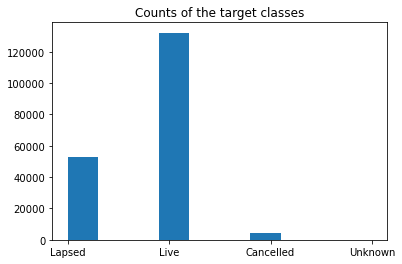

In [22]:
plt.hist(df["POL_STATUS"])
plt.title("Counts of the target classes")
plt.show()

In [34]:
df = df[df["POL_STATUS"] != 'Unknown']
df["lapse"] = np.where(df["POL_STATUS"] == "Lapsed", 1, 0)

In [35]:
print("The lapse class is " +
      str(round(df["lapse"].sum()/len(df) * 100, 2)) +
      "% of the data")

The lapse class is 27.8% of the data


## Feature analysis
- Homeowner-related features
- Home-related features
- Historical behaviour features

### Homeowner-related features
#### Client's professional status
According to the data provider's [notebook](#https://www.kaggle.com/ycanario/home-insurance-in-r#Exploratory-Data-Analysis), those classes in this column represents, R = Retired, E = Employed, N = Not Available, H = House person, S = Student, U = Unemployed. There are some unknown classes but those unknown classes appeared less frequent. There are some statistically significant difference in means in some classes but from the box plot, it seems the likelihoods of be going to lapse can take almost any value in the classes where have relatively more samples. Yet, probably a good idea that create the dummy variables and put in the model.

In [41]:
df["P1_EMP_STATUS"].value_counts()

R    146609
E     36395
S      3064
H      1069
U       921
N       754
V        68
A        52
F        29
I        28
C        16
Name: P1_EMP_STATUS, dtype: int64

In [44]:
# Likelihood of going to be lapsed
df.groupby("P1_EMP_STATUS", as_index = False).agg({"lapse":['mean', 'count']}) 

P1_EMP_STATUS     lapse        
                      mean   count
0              A  0.230769      52
1              C  0.125000      16
2              E  0.289518   36395
3              F  0.241379      29
4              H  0.331151    1069
5              I  0.500000      28
6              N  0.285146     754
7              R  0.272691  146609
8              S  0.365535    3064
9              U  0.293160     921
10             V  0.352941      68

In [55]:
professional_status = df["P1_EMP_STATUS"].unique()

for status in professional_status:
    if sp.ttest_ind(df[df["P1_EMP_STATUS"] == status]["lapse"], df[df["P1_EMP_STATUS"] != status]["lapse"])[1] < .05:
        print(str(status) +
              " class has significantly different mean from rest of the classes")
    else:
        print(str(status) +
              " class's mean is not different from rest of the classes")

R class has significantly different mean from rest of the classes
E class has significantly different mean from rest of the classes
S class has significantly different mean from rest of the classes
N class's mean is not different from rest of the classes
H class has significantly different mean from rest of the classes
U class's mean is not different from rest of the classes
A class's mean is not different from rest of the classes
F class's mean is not different from rest of the classes
I class has significantly different mean from rest of the classes
V class's mean is not different from rest of the classes
C class's mean is not different from rest of the classes


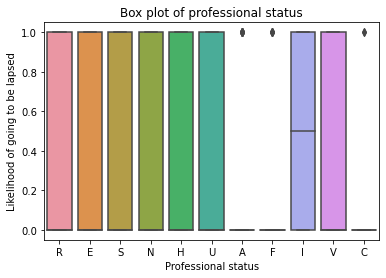

In [57]:
sns.boxplot(x = "P1_EMP_STATUS", y = "lapse", data = df)
plt.title("Box plot of professional status")
plt.xlabel("Professional status")
plt.ylabel("Likelihood of going to be lapsed")
plt.show()

#### Age
Here I calculated the customers' age at 2013-01-01. There are some people who are older than 110 years old, which looks a bit suspicious to me, but there are only 2 cases. I think they won't affect much but I will remove those cases just in case. 

I conducted a t-test to see if there's a statistical significant difference in average age. Average age in lapsed cohort is 71.72 years old and for non-lapsed cohort is 73.07 years old. The result shows that the lapsed cohort has statistically significant difference in average age

In [62]:
df["age"] = (datetime.strptime("2013-01-01", "%Y-%m-%d") - pd.to_datetime(df["P1_DOB"])).dt.days // 365

In [66]:
df["age"].describe()

count    189005.000000
mean         72.693860
std          10.918894
min          21.000000
25%          65.000000
50%          73.000000
75%          81.000000
max         123.000000
Name: age, dtype: float64

In [68]:
df[df["age"] > 110].shape

(2, 68)

In [71]:
df = df[df["age"] <= 110]

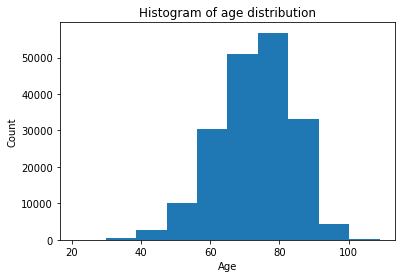

In [72]:
plt.hist(df["age"])
plt.title("Histogram of age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

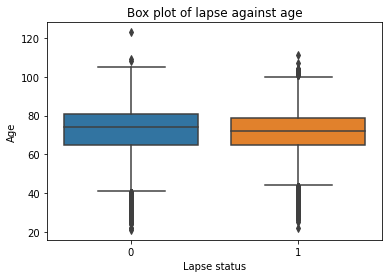

In [70]:
sns.boxplot(x = "lapse", y = "age", data = df)
plt.title("Box plot of lapse against age")
plt.xlabel("Lapse status")
plt.ylabel("Age")
plt.show()

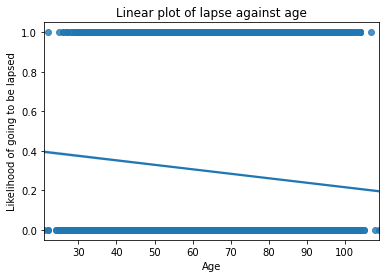

In [69]:
sns.regplot(x = "age", y = "lapse", data = df[df["age"] < 110])
plt.title("Linear plot of lapse against age")
plt.xlabel("Age")
plt.ylabel("Likelihood of going to be lapsed")
plt.show()

In [77]:
print("Average age in lapsed cohort is " +
      str(round(df[df["lapse"] == 1]["age"].mean(),2)) +
     " years old")
print("Average age in non-lapsed cohort is " +
      str(round(df[df["lapse"] == 0]["age"].mean(),2)) +
      " years old")

Average age in lapsed cohort is 71.72 years old
Average age in non-lapsed cohort is 73.07 years old


In [73]:
if sp.ttest_ind(df[df["lapse"] == 1]["age"], df[df["lapse"] == 0]["age"])[1] < .05:
    print("Lapsed cohort has statistically significant difference in average age")
else:
    print("Lapsed cohort does not have statistically significant difference in average age")

Lapsed cohort has statistically significant difference in average age


### Marital status
In this column, there are 10 marital status classes. Majority (appeared more than 10,000 times) classes are "Married", "Domestic partner", "Other", "Widow" and "Single". The interesting finding here is __the likelihood of going to be lapsed for customers who have domestic partner have particularly small. Probably those customers are more responsibles 
than other customers.__

The result of t-tests are significant except for class "N" and "B".

In [79]:
df["P1_MAR_STATUS"].value_counts()

M    66472
P    44145
O    33057
W    25507
S    10269
D     7880
A     1070
C      544
B       32
N       27
Name: P1_MAR_STATUS, dtype: int64

In [80]:
# Likelihood of going to be lapsed
df.groupby("P1_MAR_STATUS", as_index = False).agg({"lapse":['mean', 'count']}) 

P1_MAR_STATUS     lapse       
                     mean  count
0             A  0.312150   1070
1             B  0.406250     32
2             C  0.349265    544
3             D  0.326777   7880
4             M  0.353111  66472
5             N  0.407407     27
6             O  0.286021  33057
7             P  0.136890  44145
8             S  0.302269  10269
9             W  0.287607  25507

In [81]:
marital_status = df["P1_MAR_STATUS"].unique()

for status in marital_status:
    if sp.ttest_ind(df[df["P1_MAR_STATUS"] == status]["lapse"], df[df["P1_MAR_STATUS"] != status]["lapse"])[1] < .05:
        print(str(status) +
              " class has significantly different mean from rest of the classes")
    else:
        print(str(status) +
              " class's mean is not different from rest of the classes")

O class has significantly different mean from rest of the classes
M class has significantly different mean from rest of the classes
S class has significantly different mean from rest of the classes
W class has significantly different mean from rest of the classes
D class has significantly different mean from rest of the classes
P class has significantly different mean from rest of the classes
A class has significantly different mean from rest of the classes
C class has significantly different mean from rest of the classes
B class's mean is not different from rest of the classes
N class's mean is not different from rest of the classes


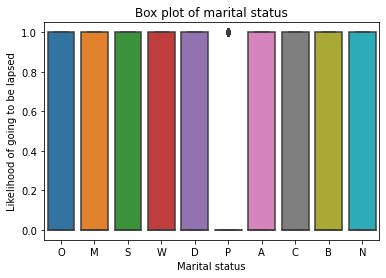

In [82]:
sns.boxplot(x = "P1_MAR_STATUS", y = "lapse", data = df)
plt.title("Box plot of marital status")
plt.xlabel("Marital status")
plt.ylabel("Likelihood of going to be lapsed")
plt.show()

### Policy Emission Denial Indicator
Most of the customers didn't refuse this. Although the average likelihood of going to be lapsed is much higher for diner, the difference is not statistically significant.

In [84]:
df["P1_POLICY_REFUSED"].value_counts()

N    188940
Y        63
Name: P1_POLICY_REFUSED, dtype: int64

In [88]:
print("Average likelihood of going to be lapsed for emission denier is " +
      str(round(df[df["P1_POLICY_REFUSED"] == "Y"]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed for emission accepter is " +
      str(round(df[df["P1_POLICY_REFUSED"] == "N"]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed for emission denier is 0.63
Average likelihood of going to be lapsed for emission accepter is 0.28


In [94]:
if sp.ttest_ind(df[df["P1_POLICY_REFUSED"] == "Y"]["lapse"], df[df["P1_POLICY_REFUSED"] == "Y"]["lapse"])[1] < .05:
    print("Emission denier has statistically significant difference in average likelihood of going be to lapsed")
else:
    print("Emission denier does not have statistically significant difference in average likelihood of going to be lapsed")

Emission denier does not have statistically significant difference in average likelihood of going to be lapsed


### Gender
Male has statistically significantly higher average likelihood of going to be lapsed.

In [90]:
df["P1_SEX"].value_counts()

M    102996
F     85919
N        88
Name: P1_SEX, dtype: int64

In [92]:
print("Average likelihood of going to be lapsed for male is " +
      str(round(df[df["P1_SEX"] == "M"]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed for female is " +
      str(round(df[df["P1_SEX"] == "F"]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed for male is 0.3
Average likelihood of going to be lapsed for female is 0.25


In [98]:
if sp.ttest_ind(df[df["P1_SEX"] == "M"]["lapse"], df[df["P1_SEX"] == "F"]["lapse"])[1] < .05:
    print("Male has statistically significant difference in average likelihood of going be to lapsed")
else:
    print("Male does not have statistically significant difference in average likelihood of going to be lapsed")

Male has statistically significant difference in average likelihood of going be to lapsed


## Home-related features
### Claim history
Past 3 years' insurance claim history has statistically significantly lower likelihood of going to be lapsed, which makes sense.

In [96]:
df["CLAIM3YEARS"].value_counts()

N    167168
Y     21835
Name: CLAIM3YEARS, dtype: int64

In [97]:
print("Average likelihood of going to be lapsed with previous claim is " +
      str(round(df[df["CLAIM3YEARS"] == "Y"]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed without previous claim is " +
      str(round(df[df["CLAIM3YEARS"] == "N"]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed with previous claim is 0.26
Average likelihood of going to be lapsed without previous claim is 0.28


In [99]:
if sp.ttest_ind(df[df["CLAIM3YEARS"] == "Y"]["lapse"], df[df["CLAIM3YEARS"] == "N"]["lapse"])[1] < .05:
    print("Claim history has statistically significant difference in average likelihood of going be to lapsed")
else:
    print("Claim history does not have statistically significant difference in average likelihood of going to be lapsed")

Claim history has statistically significant difference in average likelihood of going be to lapsed


### Usage of the house
Business usage has statistically significant difference in average likelihood of going be to lapsed.

In [100]:
df["BUS_USE"].value_counts()

N    186059
Y      2944
Name: BUS_USE, dtype: int64

In [103]:
print("Average likelihood of going to be lapsed for business usage is " +
      str(round(df[df["BUS_USE"] == "Y"]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed not for business usage is " +
      str(round(df[df["BUS_USE"] == "N"]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed for business usage is 0.38
Average likelihood of going to be lapsed not for business usage is 0.28


In [104]:
if sp.ttest_ind(df[df["BUS_USE"] == "Y"]["lapse"], df[df["BUS_USE"] == "N"]["lapse"])[1] < .05:
    print("Business usage has statistically significant difference in average likelihood of going be to lapsed")
else:
    print("Business usage does not have statistically significant difference in average likelihood of going to be lapsed")

Business usage has statistically significant difference in average likelihood of going be to lapsed


### Building coverage
Building coverage has statistically significant difference in average likelihood of going be to lapsed

In [105]:
df["AD_BUILDINGS"].value_counts()

Y    147246
N     41757
Name: AD_BUILDINGS, dtype: int64

In [107]:
print("Average likelihood of going to be lapsed for building coverage is " +
      str(round(df[df["AD_BUILDINGS"] == "Y"]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed for no building coverage is " +
      str(round(df[df["AD_BUILDINGS"] == "N"]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed for building coverage is 0.31
Average likelihood of going to be lapsed for no building coverage is 0.17


In [108]:
if sp.ttest_ind(df[df["AD_BUILDINGS"] == "Y"]["lapse"], df[df["AD_BUILDINGS"] == "N"]["lapse"])[1] < .05:
    print("Building coverage has statistically significant difference in average likelihood of going be to lapsed")
else:
    print("Building coverage does not have statistically significant difference in average likelihood of going to be lapsed")

Building coverage has statistically significant difference in average likelihood of going be to lapsed


### Geographical Classification of Risk
25% of this values are missing. I'm not sure why those missing values are happened as it's not written in the documentation. As I don't know the reason of missing value, it is not the optimal idea, but I imputed the missing values with mean value. The mean difference of statistical significance still remained.

In [113]:
df["RISK_RATED_AREA_B"].isnull().sum()/len(df)

0.25470495177325225

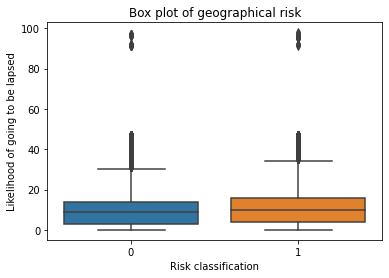

In [112]:
sns.boxplot(x = "lapse", y = "RISK_RATED_AREA_B", 
            data = df[df["RISK_RATED_AREA_B"].notnull()])
plt.title("Box plot of geographical risk")
plt.xlabel("Risk classification")
plt.ylabel("Likelihood of going to be lapsed")
plt.show()

In [115]:
if sp.ttest_ind(df[(df["lapse"] == 1) & (df["RISK_RATED_AREA_B"].notnull())]["RISK_RATED_AREA_B"], 
                df[(df["lapse"] == 0) & (df["RISK_RATED_AREA_B"].notnull())]["RISK_RATED_AREA_B"])[1] < .05:
    print("Lapsed cohort has statistically significant difference in average geographical risk classification")
else:
    print("Lapsed cohort does not have statistically significant difference in average geographical risk classification")

Lapsed cohort has statistically significant difference in average geographical risk classification


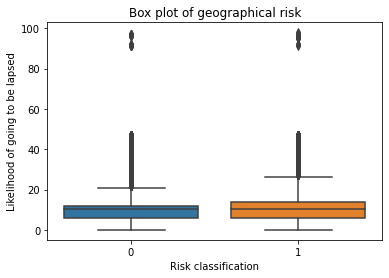

In [123]:
df["RISK_RATED_AREA_B_imputed"] = df["RISK_RATED_AREA_B"].fillna(df["RISK_RATED_AREA_B"].mean())

sns.boxplot(x = "lapse", y = "RISK_RATED_AREA_B_imputed", 
            data = df)
plt.title("Box plot of geographical risk")
plt.xlabel("Risk classification")
plt.ylabel("Likelihood of going to be lapsed")
plt.show()

In [117]:
if sp.ttest_ind(df[df["lapse"] == 1]["RISK_RATED_AREA_B_imputed"], 
                df[df["lapse"] == 0]["RISK_RATED_AREA_B_imputed"])[1] < .05:
    print("Lapsed cohort has statistically significant difference in average geographical risk classification")
else:
    print("Lapsed cohort does not have statistically significant difference in average geographical risk classification")

Lapsed cohort has statistically significant difference in average geographical risk classification


In [122]:
df["RISK_RATED_AREA_C"].isnull().sum()/len(df)

0.04619503394126019

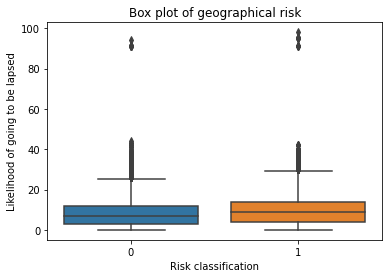

In [124]:
df["RISK_RATED_AREA_C_imputed"] = df["RISK_RATED_AREA_C"].fillna(df["RISK_RATED_AREA_C"].mean())

sns.boxplot(x = "lapse", y = "RISK_RATED_AREA_C_imputed", 
            data = df)
plt.title("Box plot of geographical risk")
plt.xlabel("Risk classification")
plt.ylabel("Likelihood of going to be lapsed")
plt.show()

In [125]:
if sp.ttest_ind(df[df["lapse"] == 1]["RISK_RATED_AREA_C_imputed"], 
                df[df["lapse"] == 0]["RISK_RATED_AREA_C_imputed"])[1] < .05:
    print("Lapsed cohort has statistically significant difference in average geographical risk classification")
else:
    print("Lapsed cohort does not have statistically significant difference in average geographical risk classification")

Lapsed cohort has statistically significant difference in average geographical risk classification


### Assured Sum
#### Buildings
There are only two unique values in this column. Their mean difference is statistically significant.

In [119]:
df["SUM_INSURED_BUILDINGS"].value_counts()

1000000.0    147070
0.0           41933
Name: SUM_INSURED_BUILDINGS, dtype: int64

In [128]:
print("Average likelihood of going to be lapsed for insured building is " +
      str(round(df[df["SUM_INSURED_BUILDINGS"] > 0]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed for not insured building is " +
      str(round(df[df["SUM_INSURED_BUILDINGS"] == 0]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed for insured building is 0.31
Average likelihood of going to be lapsed for not insured building is 0.18


In [129]:
if sp.ttest_ind(df[df["lapse"] == 1]["SUM_INSURED_BUILDINGS"], 
                df[df["lapse"] == 0]["SUM_INSURED_BUILDINGS"])[1] < .05:
    print("Insured building has statistically significant difference in average likelihood of going to be lapsed")
else:
    print("Insured building does not have statistically significant difference in average likelihood of going to be lapsed")

Insured building has statistically significant difference in average likelihood of going to be lapsed


#### Personal Items

In [131]:
df["SUM_INSURED_CONTENTS"].value_counts()

50000.0     178973
0.0           8735
75000.0        671
60000.0        309
70000.0         98
100000.0        59
65000.0         54
55000.0         44
80000.0         40
85000.0         11
90000.0          9
Name: SUM_INSURED_CONTENTS, dtype: int64

In [142]:
contents = df["SUM_INSURED_CONTENTS"].unique()

for content in contents:
    print("Average likelihood of going to be lapsed for sum of insured personal items = " + 
          str(content) +
          " is " +
          str(round(df[df["SUM_INSURED_CONTENTS"] == content]["lapse"].mean(),2))
         )

Average likelihood of going to be lapsed for sum of insured personal items = 50000.0 is 0.28
Average likelihood of going to be lapsed for sum of insured personal items = 75000.0 is 0.42
Average likelihood of going to be lapsed for sum of insured personal items = 60000.0 is 0.35
Average likelihood of going to be lapsed for sum of insured personal items = 0.0 is 0.3
Average likelihood of going to be lapsed for sum of insured personal items = 70000.0 is 0.38
Average likelihood of going to be lapsed for sum of insured personal items = 65000.0 is 0.48
Average likelihood of going to be lapsed for sum of insured personal items = 100000.0 is 0.46
Average likelihood of going to be lapsed for sum of insured personal items = 80000.0 is 0.42
Average likelihood of going to be lapsed for sum of insured personal items = 90000.0 is 0.44
Average likelihood of going to be lapsed for sum of insured personal items = 55000.0 is 0.39
Average likelihood of going to be lapsed for sum of insured personal items

In [132]:
for content in contents:
    if sp.ttest_ind(df[df["SUM_INSURED_CONTENTS"] == content]["lapse"], df[df["SUM_INSURED_CONTENTS"] != content]["lapse"])[1] < .05:
        print(str(content) +
              " class has significantly different mean from rest of the classes")
    else:
        print(str(content) +
              " class's mean is not different from rest of the classes")

50000.0 class has significantly different mean from rest of the classes
75000.0 class has significantly different mean from rest of the classes
60000.0 class has significantly different mean from rest of the classes
0.0 class has significantly different mean from rest of the classes
70000.0 class has significantly different mean from rest of the classes
65000.0 class has significantly different mean from rest of the classes
100000.0 class has significantly different mean from rest of the classes
80000.0 class has significantly different mean from rest of the classes
90000.0 class's mean is not different from rest of the classes
55000.0 class's mean is not different from rest of the classes
85000.0 class has significantly different mean from rest of the classes


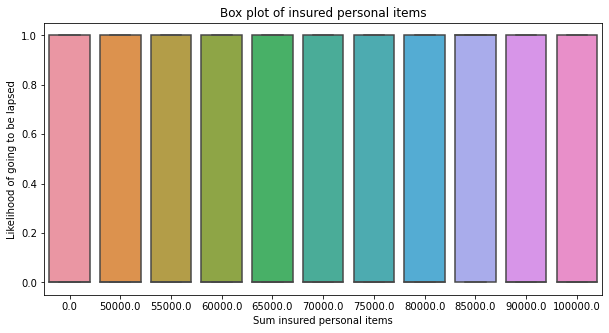

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "SUM_INSURED_CONTENTS", y = "lapse", 
            data = df)
plt.title("Box plot of insured personal items")
plt.xlabel("Sum insured personal items")
plt.ylabel("Likelihood of going to be lapsed")
plt.show()

#### Valuable Personal Property

In [144]:
df["SPEC_SUM_INSURED"].nunique()

2155

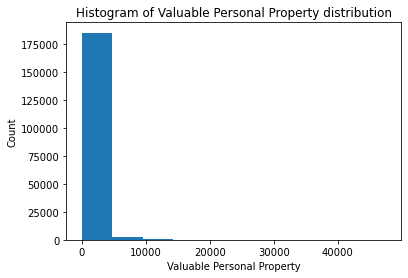

In [145]:
plt.hist(df["SPEC_SUM_INSURED"])
plt.title("Histogram of Valuable Personal Property distribution")
plt.xlabel("Valuable Personal Property")
plt.ylabel("Count")
plt.show()

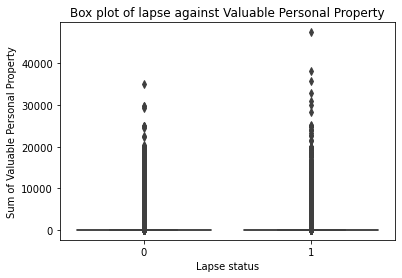

In [146]:
sns.boxplot(x = "lapse", y = "SPEC_SUM_INSURED", data = df)
plt.title("Box plot of lapse against Valuable Personal Property")
plt.xlabel("Lapse status")
plt.ylabel("Sum of Valuable Personal Property")
plt.show()

In [147]:
print("Average Valuable Personal Property in lapsed cohort is " +
      str(round(df[df["lapse"] == 1]["SPEC_SUM_INSURED"].mean(),2))
     )
print("Average Valuable Personal Property in non-lapsed cohort is " +
      str(round(df[df["lapse"] == 0]["SPEC_SUM_INSURED"].mean(),2))
     )

Average Valuable Personal Property in lapsed cohort is 436.58
Average Valuable Personal Property in non-lapsed cohort is 288.28


In [148]:
if sp.ttest_ind(df[df["lapse"] == 1]["SPEC_SUM_INSURED"], df[df["lapse"] == 0]["SPEC_SUM_INSURED"])[1] < .05:
    print("Lapsed cohort has statistically significant difference in average Valuable Personal Property")
else:
    print("Lapsed cohort does not have statistically significant difference in average Valuable Personal Property")

Lapsed cohort has statistically significant difference in average Valuable Personal Property


## Properties

In [149]:
df["APPR_ALARM"].value_counts()

N    174908
Y     14095
Name: APPR_ALARM, dtype: int64

In [153]:
print("Average likelihood of going to be lapsed for properties with appropriate alarm is " +
      str(round(df[df["APPR_ALARM"] == "Y"]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed for properties with inappropriate alarm is " +
      str(round(df[df["APPR_ALARM"] == "N"]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed for properties with appropriate alarm is 0.29
Average likelihood of going to be lapsed for properties with inappropriate alarm is 0.28


In [164]:
if sp.ttest_ind(df[df["APPR_ALARM"] == "Y"]["lapse"], 
                df[df["APPR_ALARM"] == "N"]["lapse"])[1] < .05:
    print("Properties with appropriate alarm has statistically significant difference in average likelihood of going to be lapsed")
else:
    print("Properties with appropriate alarm does not have statistically significant difference in average likelihood of going to be lapsed")

Properties with appropriate alarm has statistically significant difference in average likelihood of going to be lapsed


In [151]:
df["APPR_LOCKS"].value_counts()

Y    133913
N     55090
Name: APPR_LOCKS, dtype: int64

In [156]:
print("Average likelihood of going to be lapsed for properties with appropriate locks is " +
      str(round(df[df["APPR_LOCKS"] == "Y"]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed for properties with inappropriate locks is " +
      str(round(df[df["APPR_LOCKS"] == "N"]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed for properties with appropriate locks is 0.29
Average likelihood of going to be lapsed for properties with inappropriate locks is 0.26


In [162]:
if sp.ttest_ind(df[df["APPR_LOCKS"] == "Y"]["lapse"], 
                df[df["APPR_LOCKS"] == "N"]["lapse"])[1] < .05:
    print("Properties with appropriate locks has statistically significant difference in average likelihood of going to be lapsed")
else:
    print("Properties with appropriate locks does not have statistically significant difference in average likelihood of going to be lapsed")

Properties with appropriate locks has statistically significant difference in average likelihood of going to be lapsed


In [158]:
df["BEDROOMS"].value_counts()

3.0    98841
2.0    52968
4.0    23991
1.0     9804
5.0     3264
6.0      118
7.0       17
Name: BEDROOMS, dtype: int64

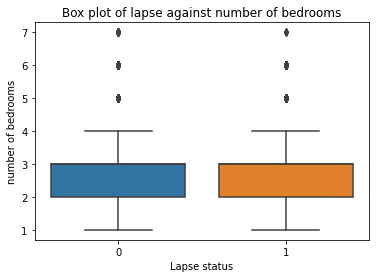

In [161]:
sns.boxplot(x = "lapse", y = "BEDROOMS", data = df)
plt.title("Box plot of lapse against number of bedrooms")
plt.xlabel("Lapse status")
plt.ylabel("number of bedrooms")
plt.show()

In [182]:
if sp.ttest_ind(df[df["APPR_LOCKS"] == "Y"]["lapse"], 
                df[df["APPR_LOCKS"] == "N"]["lapse"])[1] < .05:
    print("Properties with appropriate locks has statistically significant difference in average likelihood of going to be lapsed")
else:
    print("Properties with appropriate locks does not have statistically significant difference in average likelihood of going to be lapsed")

Properties with appropriate locks has statistically significant difference in average likelihood of going to be lapsed


#### National heritage building
I am not sure what does this column is showing. The majority class is 3, and I guess the natinal heritage building shouldn't be the majority class so 3 is probably not national heritage building.

In [165]:
df["LISTED"].value_counts()

3.0    187915
2.0       933
4.0        75
5.0        50
1.0        30
Name: LISTED, dtype: int64

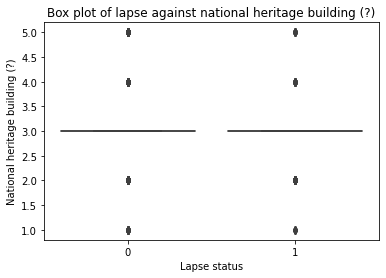

In [166]:
sns.boxplot(x = "lapse", y = "LISTED", data = df)
plt.title("Box plot of lapse against national heritage building (?)")
plt.xlabel("Lapse status")
plt.ylabel("National heritage building (?)")
plt.show()

#### Year built
Most prererties were built after 1900. I have calculated the property age. Lapse cohort has statistically significant difference in average property age.

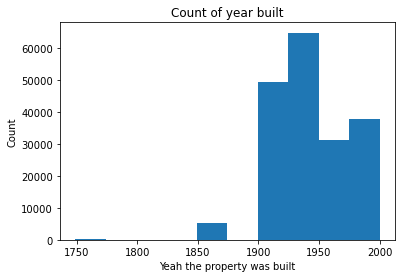

In [167]:
plt.hist(df["YEARBUILT"])
plt.title("Count of year built")
plt.xlabel("Yeah the property was built")
plt.ylabel("Count")
plt.show()

In [176]:
df["property_age"] = 2013 - df["YEARBUILT"]

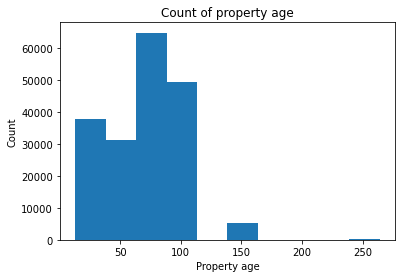

In [179]:
plt.hist(df["property_age"])
plt.title("Count of property age")
plt.xlabel("Property age")
plt.ylabel("Count")
plt.show()

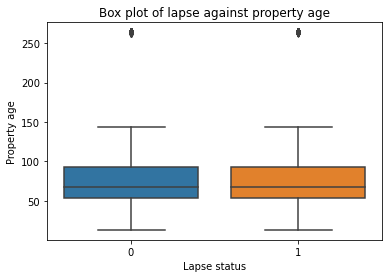

In [180]:
sns.boxplot(x = "lapse", y = "property_age", data = df)
plt.title("Box plot of lapse against property age")
plt.xlabel("Lapse status")
plt.ylabel("Property age")
plt.show()

In [183]:
if sp.ttest_ind(df[df["lapse"] == 1]["property_age"], 
                df[df["lapse"] == 0]["property_age"])[1] < .05:
    print("Lapse cohort has statistically significant difference in average property age")
else:
    print("Lapse cohort does not have statistically significant difference in average property age")

Lapse cohort has statistically significant difference in average property age


#### Occupancy
Occupancy status has 7 classes but not sure what do those classes mean. I guess "PH" is permanent housing? Same for ownership type, this column has some integers but don't know what are those integers. 

In [184]:
df["OCC_STATUS"].value_counts()

PH    188193
LP       606
HH       124
UN        72
WD         4
WE         2
OT         2
Name: OCC_STATUS, dtype: int64

In [185]:
df["OWNERSHIP_TYPE"].value_counts()

8.0     149740
3.0      27387
12.0      4686
18.0      3647
14.0      2610
2.0        416
7.0        158
11.0       118
13.0       109
17.0        83
16.0        28
6.0         12
1.0          5
15.0         4
Name: OWNERSHIP_TYPE, dtype: int64

In [186]:
df["MAX_DAYS_UNOCC"].value_counts()

0.0      137428
30.0      51168
181.0       299
90.0         70
180.0        20
120.0        17
60.0          1
Name: MAX_DAYS_UNOCC, dtype: int64

In [187]:
df["PAYING_GUESTS"].value_counts()

0.0    188796
1.0       207
Name: PAYING_GUESTS, dtype: int64

## Historical behaviour features
### Payment method
I think those classes mean non-direct debit, direct debit and other. Those customers who didn't set direct debit have higher likelihood of going to be lapsed.

The result of t-test is staitstically significant for all the classes.

In [191]:
df["PAYMENT_METHOD"].value_counts()

NonDD       95053
PureDD      85614
DD-Other     8336
Name: PAYMENT_METHOD, dtype: int64

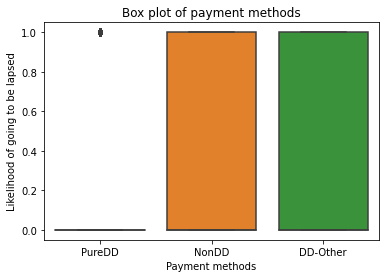

In [234]:
sns.boxplot(x = "PAYMENT_METHOD", y = "lapse", data = df)
plt.title("Box plot of payment methods")
plt.xlabel("Payment methods")
plt.ylabel("Likelihood of going to be lapsed")
plt.show()

In [248]:
methods = df["PAYMENT_METHOD"].unique()

for method in methods:
    print("Average likelihood of going to be lapsed for payment method = " + 
          str(method) +
          " is " +
          str(round(df[df["PAYMENT_METHOD"] == method]["lapse"].mean(),2))
         )

Average likelihood of going to be lapsed for payment method = PureDD is 0.2
Average likelihood of going to be lapsed for payment method = NonDD is 0.35
Average likelihood of going to be lapsed for payment method = DD-Other is 0.27


In [238]:
for method in methods:
    if sp.ttest_ind(df[df["PAYMENT_METHOD"] == method]["lapse"], 
                    df[df["PAYMENT_METHOD"] != method]["lapse"])[1] < .05:
        print(str(method) +
              " class has significantly different mean from rest of the classes")
    else:
        print(str(method) +
              " class's mean is not different from rest of the classes")

PureDD class has significantly different mean from rest of the classes
NonDD class has significantly different mean from rest of the classes
DD-Other class has significantly different mean from rest of the classes


### Payment frequency
This column has 1 class with missing values. I guess those missing values can be assumed as 0. But still don't know the exact meaning of this column. I expected actual frequence (monthly, quarterly, etc) but this is a binary variable.

In [192]:
df["PAYMENT_FREQUENCY"].value_counts()

1.0    80548
Name: PAYMENT_FREQUENCY, dtype: int64

### Mid-term Term Adjustment

In [193]:
df["MTA_FLAG"].value_counts()

N    133629
Y     55374
Name: MTA_FLAG, dtype: int64

In [195]:
print("Average likelihood of going to be lapsed for properties with midterm term adjustmnet is " +
      str(round(df[df["MTA_FLAG"] == "Y"]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed for properties without midterm term adjustmnet is " +
      str(round(df[df["MTA_FLAG"] == "N"]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed for properties with midterm term adjustmnet is 0.28
Average likelihood of going to be lapsed for properties without midterm term adjustmnet is 0.28


In [197]:
if sp.ttest_ind(df[df["MTA_FLAG"] == "Y"]["lapse"], 
                df[df["MTA_FLAG"] == "N"]["lapse"])[1] < .05:
    print("Properties with midterm term adjustmnet has statistically significant difference in average likelihood of going to be lapsed")
else:
    print("Properties with midterm term adjustmnet does not have statistically significant difference in average likelihood of going to be lapsed")

Properties with midterm term adjustmnet has statistically significant difference in average likelihood of going to be lapsed


In [199]:
df["MTA_APRP"].describe()

count    55374.000000
mean        90.576399
std        121.963927
min       -423.080000
25%          0.000000
50%          0.000000
75%        180.817500
max       1449.240000
Name: MTA_APRP, dtype: float64

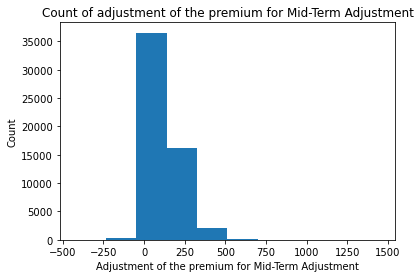

In [201]:
plt.hist(df["MTA_APRP"])
plt.title("Count of adjustment of the premium for Mid-Term Adjustment")
plt.xlabel("Adjustment of the premium for Mid-Term Adjustment")
plt.ylabel("Count")
plt.show()

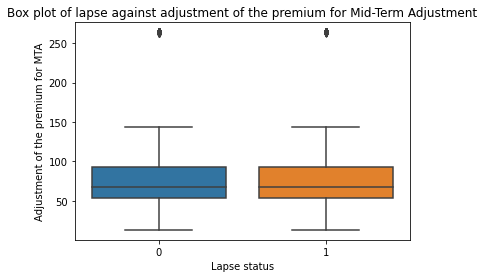

In [203]:
sns.boxplot(x = "lapse", y = "property_age", data = df)
plt.title("Box plot of lapse against adjustment of the premium for Mid-Term Adjustment")
plt.xlabel("Lapse status")
plt.ylabel("Adjustment of the premium for MTA")
plt.show()

### Cover period feature
When the cover started date is more recent, the likelihood of going to be lapsed is higher, which makes sense. This difference is statistically significant.

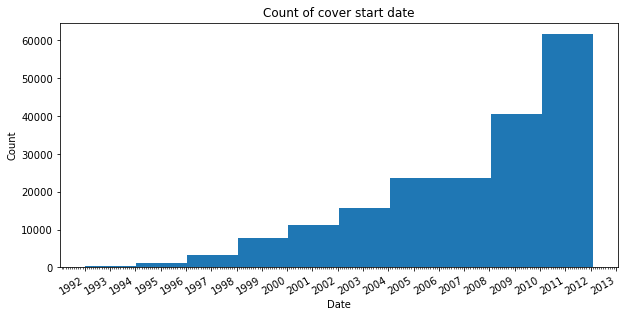

In [224]:
years = mdates.YearLocator()
months = mdates.MonthLocator()  
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(pd.to_datetime(df["COVER_START"]))

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)


ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' %

fig.autofmt_xdate()

plt.title("Count of cover start date")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

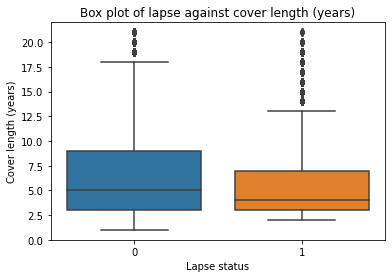

In [227]:
df["cover_length"] = 2013 - pd.to_datetime(df["COVER_START"]).dt.year

sns.boxplot(x = "lapse", y = "cover_length", data = df)
plt.title("Box plot of lapse against cover length (years)")
plt.xlabel("Lapse status")
plt.ylabel("Cover length (years)")
plt.show()

In [249]:
print("Average cover length for lapsed cohort is " +
      str(round(df[df["lapse"] ==1]["cover_length"].mean(),2))
     )
print("Average likelihood of going to be lapsed for properties without midterm term adjustmnet is " +
      str(round(df[df["lapse"] == 0]["cover_length"].mean(),2))
     )

Average cover length for lapsed cohort is 5.05
Average likelihood of going to be lapsed for properties without midterm term adjustmnet is 6.38


In [228]:
if sp.ttest_ind(df[df["lapse"] == 1]["cover_length"], 
                df[df["lapse"] == 0]["cover_length"])[1] < .05:
    print("Lapse cohort has statistically significant difference in average cover length")
else:
    print("Lapse cohort does not have statistically significant difference in average cover length")

Lapse cohort has statistically significant difference in average cover length


### Last year total premium
Lapsed cohort has statistically significantly higher average last year's total premium. 

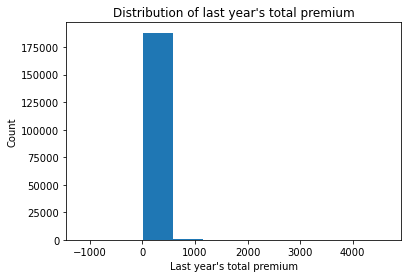

In [239]:
plt.hist(df["LAST_ANN_PREM_GROSS"])
plt.title("Distribution of last year's total premium")
plt.xlabel("Last year's total premium")
plt.ylabel("Count")
plt.show()

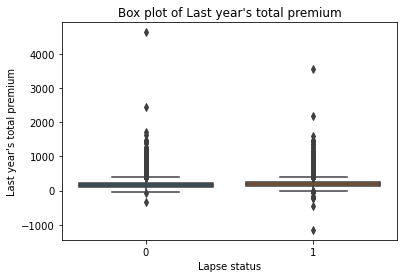

In [231]:
sns.boxplot(x = "lapse", y = "LAST_ANN_PREM_GROSS", data = df)
plt.title("Box plot of Last year's total premium")
plt.xlabel("Lapse status")
plt.ylabel("Last year's total premium")
plt.show()

In [233]:
print("Average last year's total premium for lapsed cohort is " +
      str(round(df[df["lapse"] == 1]["LAST_ANN_PREM_GROSS"].mean(),2))
     )
print("Average last year's total premium for non-lapsed cohort is " +
      str(round(df[df["lapse"] == 0]["LAST_ANN_PREM_GROSS"].mean(),2))
     )

Average last year's total premium for lapsed cohort is 196.63
Average last year's total premium for non-lapsed cohort is 182.91


In [232]:
if sp.ttest_ind(df[df["lapse"] == 1]["LAST_ANN_PREM_GROSS"], 
                df[df["lapse"] == 0]["LAST_ANN_PREM_GROSS"])[1] < .05:
    print("Lapse cohort has statistically significant difference in average last year's total premium")
else:
    print("Lapse cohort does not have statistically significant difference in average last year's total premium")

Lapse cohort has statistically significant difference in average last year's total premium


## Renewal features
### Emergency option before 1st renewal

In [244]:
df["HOME_EM_ADDON_PRE_REN"].value_counts()

N    136170
Y     52833
Name: HOME_EM_ADDON_PRE_REN, dtype: int64

In [245]:
print("Average likelihood of going to be lapsed for customers who had emergency option before 1st renewal is " +
      str(round(df[df["HOME_EM_ADDON_PRE_REN"] == "Y"]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed who had emergency option before 1st renewal is " +
      str(round(df[df["HOME_EM_ADDON_PRE_REN"] == "N"]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed for customers who had emergency option before 1st renewal is 0.27
Average likelihood of going to be lapsed who had emergency option before 1st renewal is 0.28


In [246]:
if sp.ttest_ind(df[df["HOME_EM_ADDON_PRE_REN"] == "Y"]["lapse"], 
                df[df["HOME_EM_ADDON_PRE_REN"] == "N"]["lapse"])[1] < .05:
    print("Customers who had emergency option before 1st renewal has statistically significant difference in average likelihood of going to be lapsed")
else:
    print("Customers who had emergency option before 1st renewal does not have statistically significant difference in average likelihood of going to be lapsed")

Customers who had emergency option before 1st renewal has statistically significant difference in average likelihood of going to be lapsed


### Emergency option after 1st renewal

In [247]:
df["HOME_EM_ADDON_POST_REN"].value_counts()

N    179803
Y      9200
Name: HOME_EM_ADDON_POST_REN, dtype: int64

In [241]:
print("Average likelihood of going to be lapsed for customers who had emergency option before 1st renewal is " +
      str(round(df[df["HOME_EM_ADDON_POST_REN"] == "Y"]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed who had emergency option before 1st renewal is " +
      str(round(df[df["HOME_EM_ADDON_POST_REN"] == "N"]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed for customers who had emergency option before 1st renewal is 0.27
Average likelihood of going to be lapsed who had emergency option before 1st renewal is 0.28


In [246]:
if sp.ttest_ind(df[df["HOME_EM_ADDON_PRE_REN"] == "Y"]["lapse"], 
                df[df["HOME_EM_ADDON_PRE_REN"] == "N"]["lapse"])[1] < .05:
    print("Customers who had emergency option before 1st renewal has statistically significant difference in average likelihood of going to be lapsed")
else:
    print("Customers who had emergency option before 1st renewal does not have statistically significant difference in average likelihood of going to be lapsed")

Customers who had emergency option before 1st renewal has statistically significant difference in average likelihood of going to be lapsed


### Replacement of keys option was included before 1st renewal

In [251]:
df["KEYCARE_ADDON_PRE_REN"].value_counts()

N    180105
Y      8898
Name: KEYCARE_ADDON_PRE_REN, dtype: int64

In [252]:
print("Average likelihood of going to be lapsed for customers who had key replacement option before 1st renewal is " +
      str(round(df[df["KEYCARE_ADDON_PRE_REN"] == "Y"]["lapse"].mean(),2))
     )
print("Average likelihood of going to be lapsed who had key replacement option before 1st renewal is " +
      str(round(df[df["KEYCARE_ADDON_PRE_REN"] == "N"]["lapse"].mean(),2))
     )

Average likelihood of going to be lapsed for customers who had key replacement option before 1st renewal is 0.29
Average likelihood of going to be lapsed who had key replacement option before 1st renewal is 0.28


In [253]:
if sp.ttest_ind(df[df["KEYCARE_ADDON_PRE_REN"] == "Y"]["lapse"], 
                df[df["KEYCARE_ADDON_PRE_REN"] == "N"]["lapse"])[1] < .05:
    print("Customers who had key replacement option before 1st renewal has statistically significant difference in average likelihood of going to be lapsed")
else:
    print("Customers who had key replacement option before 1st renewal does not have statistically significant difference in average likelihood of going to be lapsed")

Customers who had key replacement option before 1st renewal has statistically significant difference in average likelihood of going to be lapsed


In [221]:
pd.to_datetime(df["COVER_START"]).min()

Timestamp('1992-01-12 00:00:00')

In [190]:
df.columns

Index(['QUOTE_DATE', 'COVER_START', 'CLAIM3YEARS', 'P1_EMP_STATUS',
       'P1_PT_EMP_STATUS', 'BUS_USE', 'CLERICAL', 'AD_BUILDINGS',
       'RISK_RATED_AREA_B', 'SUM_INSURED_BUILDINGS', 'NCD_GRANTED_YEARS_B',
       'AD_CONTENTS', 'RISK_RATED_AREA_C', 'SUM_INSURED_CONTENTS',
       'NCD_GRANTED_YEARS_C', 'CONTENTS_COVER', 'BUILDINGS_COVER',
       'SPEC_SUM_INSURED', 'SPEC_ITEM_PREM', 'UNSPEC_HRP_PREM', 'P1_DOB',
       'P1_MAR_STATUS', 'P1_POLICY_REFUSED', 'P1_SEX', 'APPR_ALARM',
       'APPR_LOCKS', 'BEDROOMS', 'ROOF_CONSTRUCTION', 'WALL_CONSTRUCTION',
       'FLOODING', 'LISTED', 'MAX_DAYS_UNOCC', 'NEIGH_WATCH', 'OCC_STATUS',
       'OWNERSHIP_TYPE', 'PAYING_GUESTS', 'PROP_TYPE', 'SAFE_INSTALLED',
       'SEC_DISC_REQ', 'SUBSIDENCE', 'YEARBUILT', 'CAMPAIGN_DESC',
       'PAYMENT_METHOD', 'PAYMENT_FREQUENCY', 'LEGAL_ADDON_PRE_REN',
       'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
       'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
       'GARDEN_ADDON_POST_REN', 'KEYCARE

In [229]:
df["LAST_ANN_PREM_GROSS"].isnull().sum()

0

In [207]:
df.isnull().sum()

QUOTE_DATE                   109866
COVER_START                       0
CLAIM3YEARS                       0
P1_EMP_STATUS                     0
P1_PT_EMP_STATUS             187221
BUS_USE                           0
CLERICAL                     186059
AD_BUILDINGS                      0
RISK_RATED_AREA_B             48140
SUM_INSURED_BUILDINGS             0
NCD_GRANTED_YEARS_B               0
AD_CONTENTS                       0
RISK_RATED_AREA_C              8731
SUM_INSURED_CONTENTS              0
NCD_GRANTED_YEARS_C               0
CONTENTS_COVER                    0
BUILDINGS_COVER                   0
SPEC_SUM_INSURED                  0
SPEC_ITEM_PREM                    0
UNSPEC_HRP_PREM                   0
P1_DOB                            0
P1_MAR_STATUS                     0
P1_POLICY_REFUSED                 0
P1_SEX                            0
APPR_ALARM                        0
APPR_LOCKS                        0
BEDROOMS                          0
ROOF_CONSTRUCTION           